In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('modified_location_0.xlsx')

In [3]:
df.shape

(60869, 15)

In [4]:
df.isnull().sum()

Date                     0
Day                      0
Year                     0
Month                    0
Location                 0
Rainfall (in mm)         0
Latitude                 0
Longitude                0
Quarter                  0
Cumulative_Rainfall      0
Previous_Day_Rainfall    0
Weekly_Average           0
hasRainfall              0
HighRainfall             0
Season                   0
dtype: int64

In [5]:
df.head()


,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly_Average,hasRainfall,HighRainfall,Season
0,1901-01-01,Day_1,1901,1,Loc_0,3.0,27.25,88.25,1,3.0,0.0,3.000000,yes,no,Winter
1,1901-01-02,Day_2,1901,1,Loc_0,8.0,27.25,88.25,1,11.0,3.0,5.500000,yes,no,Winter
2,1901-01-03,Day_3,1901,1,Loc_0,0.0,27.25,88.25,1,11.0,8.0,3.666667,no,no,Winter
3,1901-01-04,Day_4,1901,1,Loc_0,0.0,27.25,88.25,1,8.0,0.0,2.750000,no,no,Winter
4,1901-01-05,Day_5,1901,1,Loc_0,0.0,27.25,88.25,1,0.0,0.0,2.200000,no,no,Winter


In [22]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df["Year-Month-Day"] = df["Date"].dt.strftime("%Y-%m-%d")  # More precise date format

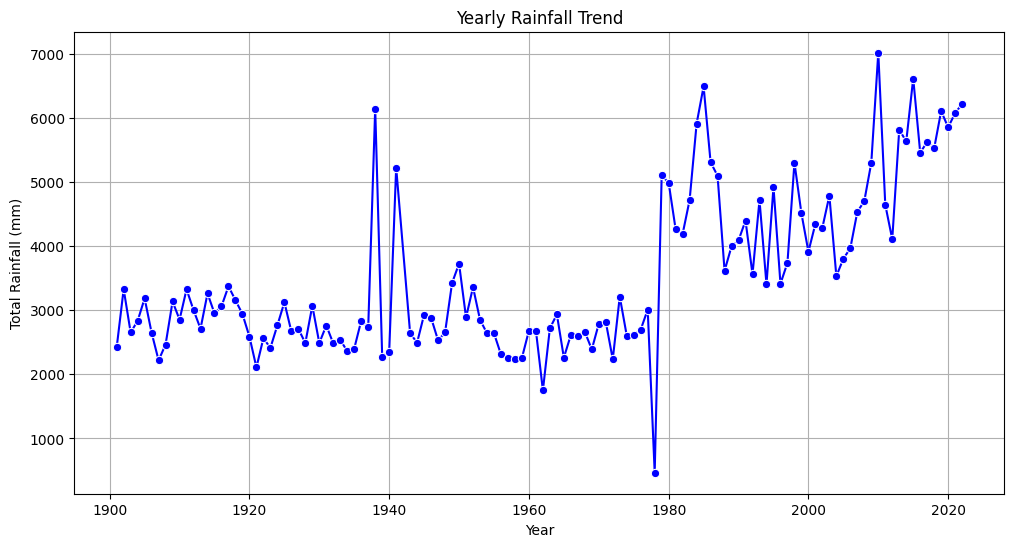

In [23]:
# Yearly Rainfall Trend
yearly_rainfall = df.groupby("Year")["Rainfall (in mm)"].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.title("Yearly Rainfall Trend")
plt.grid(True)
plt.show()

C:\Users\apoor\AppData\Local\Temp\ipykernel_9240\4196964380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")


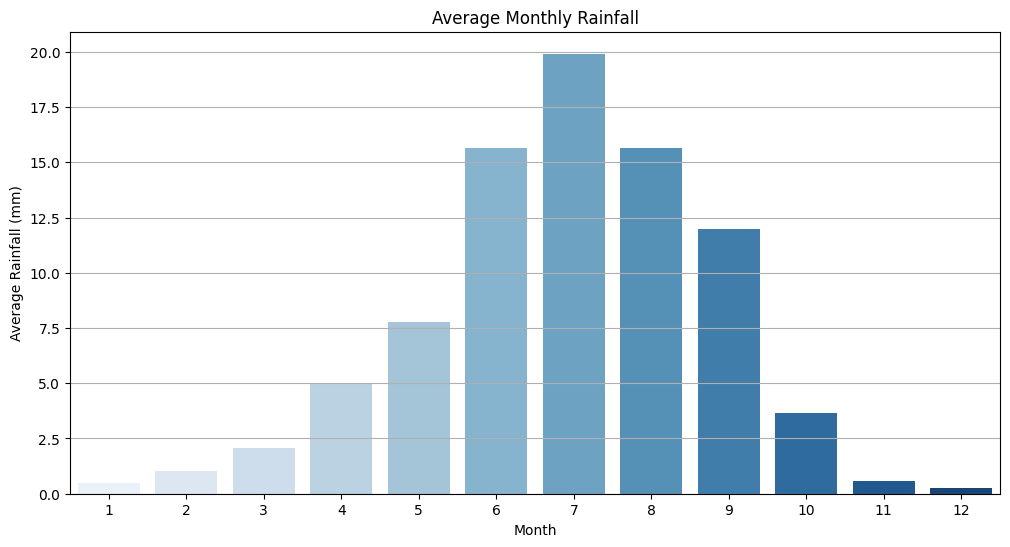

In [24]:
# Monthly and Seasonal Rainfall
monthly_rainfall = df.groupby("Month")["Rainfall (in mm)"].mean()
seasonal_rainfall = df.groupby("Season")["Rainfall (in mm)"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall")
plt.grid(axis="y")
plt.show()

C:\Users\apoor\AppData\Local\Temp\ipykernel_9240\99370349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_rainfall.index, y=seasonal_rainfall.values, palette="coolwarm")


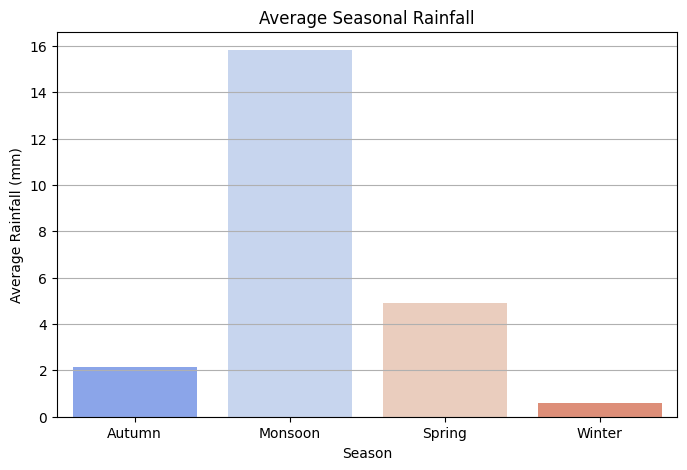

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rainfall.index, y=seasonal_rainfall.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Seasonal Rainfall")
plt.grid(axis="y")
plt.show()

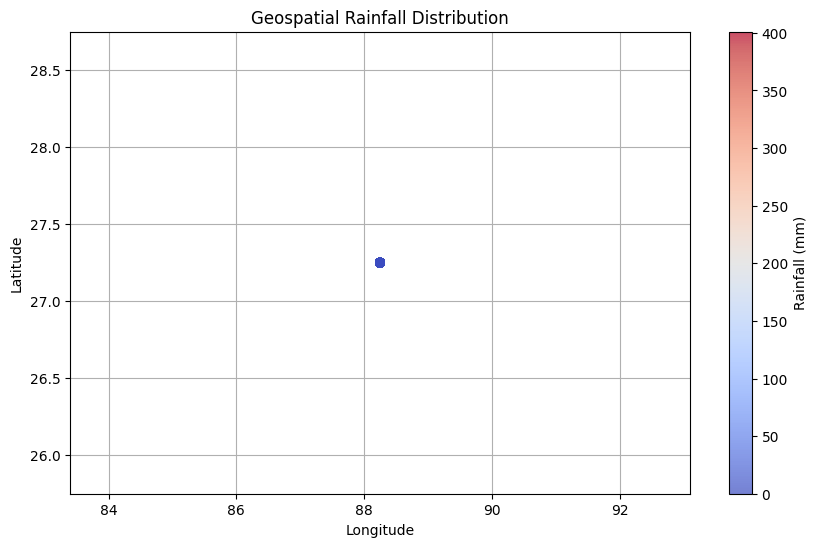

In [26]:
# Geospatial Rainfall Distribution
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Longitude"], df["Latitude"], c=df["Rainfall (in mm)"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Rainfall Distribution")
plt.colorbar(scatter, label="Rainfall (mm)")
plt.grid(True)
plt.show()

In [27]:
# Identify Continuous Rainfall Days
df_sorted = df.sort_values(by=["Location", "Date"])
df_sorted["Rain_Streak"] = (df_sorted["Rainfall (in mm)"] > 0).astype(int)
df_sorted["Rain_Streak"] = df_sorted.groupby("Location")["Rain_Streak"].cumsum()
rain_streaks = df_sorted.groupby(["Location", "Rain_Streak"])["Date"].count().reset_index()
rain_streaks = rain_streaks[rain_streaks["Date"] >= 5]  # Filter for at least 5 continuous days

# Display locations with longest continuous rainy periods
rain_streaks_sorted = rain_streaks.sort_values(by="Date", ascending=False)
print(rain_streaks_sorted.head(10))


      Location  Rain_Streak  Date
21336    Loc_0        21337   161
29674    Loc_0        29675   161
30066    Loc_0        30067   153
25160    Loc_0        25161   147
26812    Loc_0        26813   135
7202     Loc_0         7203   126
16050    Loc_0        16051   125
28118    Loc_0        28119   123
14206    Loc_0        14207   119
28532    Loc_0        28533   115


In [33]:
rain_streaks_sorted["Date"] = pd.to_datetime(rain_streaks_sorted["Date"]).dt.strftime("%d-%m-%Y")  # Format as Day-Month-Year
print(rain_streaks_sorted.head(10))


      Location  Rain_Streak        Date
21336    Loc_0        21337  01-01-1970
29674    Loc_0        29675  01-01-1970
30066    Loc_0        30067  01-01-1970
25160    Loc_0        25161  01-01-1970
26812    Loc_0        26813  01-01-1970
7202     Loc_0         7203  01-01-1970
16050    Loc_0        16051  01-01-1970
28118    Loc_0        28119  01-01-1970
14206    Loc_0        14207  01-01-1970
28532    Loc_0        28533  01-01-1970


In [34]:
rain_streaks_sorted.tail()

,Location,Rain_Streak,Date
29752,Loc_0,29753,01-01-1970
29826,Loc_0,29827,01-01-1970
30072,Loc_0,30073,01-01-1970
30078,Loc_0,30079,01-01-1970
30092,Loc_0,30093,01-01-1970


In [51]:
import geopandas as gpd

In [47]:
# Load Sikkim shapefile
sikkim_shapefile = "C:\\Users\\apoor\\Downloads\\AnyConv.com__IND_sikkim.7z"
sikkim = gpd.read_file(sikkim_shapefile)

DataSourceError: 'C:\Users\apoor\Downloads\AnyConv.com__IND_sikkim.7z' not recognized as being in a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.